In [74]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

In [75]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
# train.head()

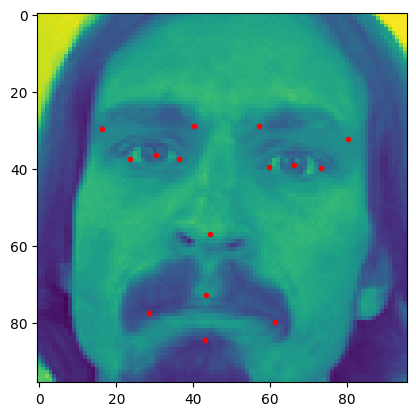

In [76]:
X = train['Image'] 
Y = train.drop(['Image'], axis=1)
y = train.iloc[:,:30].values

st = X[0].split(' ')
st2=[float(i) for i in st]

for i in range(0,15):
    plt.plot(y[0,i*2], y[0,(i*2)+1], marker='.', color="red") 

plt.imshow( np.reshape(st2,(96,96)))
# len(st)

In [77]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7049 entries, 0 to 7048
Series name: Image
Non-Null Count  Dtype 
--------------  ----- 
7049 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [78]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [79]:
import math
missing_elements = []
print('y:',y.shape[0])
for x1 in range(0,y.shape[0]):
    for y1 in range(0,30):
        try:
            if  math.isnan(float(y[x1,y1])):
                missing_elements.append([x1,y1])
        except:
            missing_elements.append([x1,y1])
missing_elements

y: 7049


[[210, 28],
 [210, 29],
 [350, 28],
 [350, 29],
 [499, 28],
 [499, 29],
 [512, 28],
 [512, 29],
 [810, 28],
 [810, 29],
 [839, 28],
 [839, 29],
 [895, 28],
 [895, 29],
 [1058, 28],
 [1058, 29],
 [1194, 28],
 [1194, 29],
 [1230, 28],
 [1230, 29],
 [1245, 28],
 [1245, 29],
 [1546, 28],
 [1546, 29],
 [1548, 28],
 [1548, 29],
 [1585, 14],
 [1585, 15],
 [1588, 14],
 [1588, 15],
 [1598, 14],
 [1598, 15],
 [1601, 18],
 [1601, 19],
 [1605, 18],
 [1605, 19],
 [1620, 2],
 [1620, 3],
 [1620, 8],
 [1620, 9],
 [1620, 10],
 [1620, 11],
 [1620, 22],
 [1620, 23],
 [1620, 24],
 [1620, 25],
 [1624, 14],
 [1624, 15],
 [1626, 14],
 [1626, 15],
 [1627, 14],
 [1627, 15],
 [1629, 14],
 [1629, 15],
 [1636, 12],
 [1636, 13],
 [1636, 14],
 [1636, 15],
 [1636, 16],
 [1636, 17],
 [1636, 18],
 [1636, 19],
 [1643, 2],
 [1643, 3],
 [1643, 8],
 [1643, 9],
 [1643, 10],
 [1643, 11],
 [1646, 14],
 [1646, 15],
 [1646, 16],
 [1646, 17],
 [1646, 18],
 [1646, 19],
 [1647, 18],
 [1647, 19],
 [1652, 8],
 [1652, 9],
 [1652, 10

In [ ]:

missing_images_no=np.unique( np.array(missing_elements)[:,0])
print('missing images count :',missing_images_no.shape)

column_name = list(train.columns)
column_name1 = column_name.remove('Image')

#print('column_name',column_name[0])

missing_image=[]
ele_prv=[0,0]
for ele in missing_elements[0:10]:
    if ele_prv[0] == ele[0]:
        missing_image.append([ele[0],[ele_prv[1],ele[1]]])
    ele_prv=ele

imageNo=missing_image[0][0]
    
print('missing point name1:',column_name[missing_image[0][1][0]])
print('missing point name2:',column_name[missing_image[0][1][1]])
st = X[imageNo].split(' ')
st2=[float(i) for i in st]
plt.imshow( np.reshape(st2,(96,96)))

# Dropping images of missing values
X=np.delete(X, missing_images_no, axis=0)
y=np.delete(y, missing_images_no, axis=0)

print('X count:',X.shape)
print('y count:',y.shape)

rowCount 2140
X_arr: (2140, 9216)
y: (2140, 30)
X_test_arr: (1783, 9216)
img: (2140, 96, 96, 1)
img_test: (1783, 96, 96, 1)


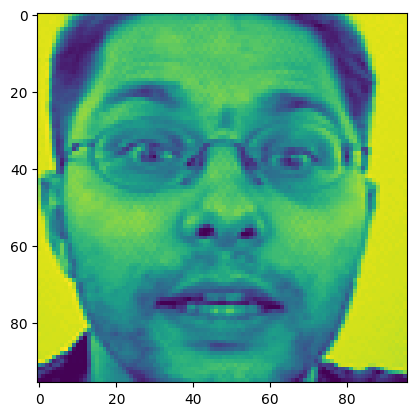

In [60]:
import numpy as np

X_test = test['Image']

rowCount= X.shape[0] 
print('rowCount',rowCount)

X_arr=np.zeros(shape=(rowCount,9216))
X_test_arr=np.zeros(shape=(X_test.shape[0],9216))
img=[]
img_test=[]

for i in range(rowCount):
    st = X[i].split(' ')
    X_arr[i,:]=st
    img2= np.reshape(st, (96, 96,1)).astype(float) 
    img.append( img2 )

for i in range(X_test.shape[0]):
    st_test= X_test[i].split(' ')
    X_test_arr[i,:]=st_test
    img1= np.reshape(st_test, (96, 96,1)).astype(float)  
    img_test.append( img1 ) 

print('X_arr:',X_arr.shape)
print('y:',y.shape)

print('X_test_arr:',X_test_arr.shape)

plt.imshow( img[0])
print('img:',np.array(img).shape)

plt.imshow( img_test[0])
print('img_test:',np.array(img_test).shape)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Normalization

X_train, X_val, y_train, y_val = train_test_split(np.array(img), y, test_size=0.25, random_state=1)
X_train = X_train / 255.0
# X_test  = X_test  / 255.0

model = Sequential()
# model.add(Normalization())
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(96,96,1)))
# model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D())
    
model.add(Conv2D(32,(3,3),1,activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D())
    
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
    
model.add(Flatten())
    
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
#loss func is categorical_crossentropy, acc is 59.88; but mean_absolute_error acc:64.08
model.compile('adam',loss='mean_absolute_error',metrics=['accuracy'])

In [63]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 94, 94, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 47, 47, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 22, 22, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 10, 10, 32)       

In [65]:
hist=model.fit( X_train,y_train ,epochs=20)

y_pred=model.predict(X_val)

Epoch 1/20
51/51 [==============================] - 4s 30ms/step - loss: 34.2157 - accuracy: 0.0012
Epoch 2/20
51/51 [==============================] - 1s 28ms/step - loss: 9.4503 - accuracy: 0.4498
Epoch 3/20
51/51 [==============================] - 1s 26ms/step - loss: 7.1038 - accuracy: 0.6897
Epoch 4/20
51/51 [==============================] - 1s 25ms/step - loss: 6.9835 - accuracy: 0.7040
Epoch 5/20
51/51 [==============================] - 1s 23ms/step - loss: 6.5045 - accuracy: 0.7034
Epoch 6/20
51/51 [==============================] - 1s 24ms/step - loss: 6.3792 - accuracy: 0.7028
Epoch 7/20
51/51 [==============================] - 1s 23ms/step - loss: 6.4233 - accuracy: 0.7009
Epoch 8/20
51/51 [==============================] - 1s 24ms/step - loss: 6.3382 - accuracy: 0.7047
Epoch 9/20
51/51 [==============================] - 1s 24ms/step - loss: 6.1858 - accuracy: 0.7034
Epoch 10/20
51/51 [==============================] - 1s 24ms/step - loss: 6.2842 - accuracy: 0.7034
Epoch 11

In [66]:
y_pred = model.predict(np.array(img_test))

56/56 [==============================] - 1s 17ms/step


In [67]:
IdLookupTable_data = pd.read_csv('IdLookupTable.csv')

In [68]:
print(IdLookupTable_data)
dfP=pd.DataFrame(columns=['RowId','ImageId','FeatureName','Location'])

rowNo=0
for x1 in range(y_pred.shape[0]):
    for y1 in range(y_pred.shape[1]):
         new_row = {"RowId":rowNo,
                    "ImageId": test.iloc[x1][0],
                    "FeatureName": column_name[y1],
                    "Location":y_pred[x1,y1]/1000                  
                   }
         dfP=pd.concat([dfP, pd.DataFrame([new_row])], ignore_index=False)
         rowNo=rowNo+1
print('df shape:',dfP.shape)
print('dfP:')
print(dfP)

df = pd.merge( IdLookupTable_data,dfP, how="inner", on=["ImageId","FeatureName"])

print(df.shape)
print(df)

       RowId  ImageId                FeatureName  Location
0          1        1          left_eye_center_x       NaN
1          2        1          left_eye_center_y       NaN
2          3        1         right_eye_center_x       NaN
3          4        1         right_eye_center_y       NaN
4          5        1    left_eye_inner_corner_x       NaN
...      ...      ...                        ...       ...
27119  27120     1783         right_eye_center_y       NaN
27120  27121     1783                 nose_tip_x       NaN
27121  27122     1783                 nose_tip_y       NaN
27122  27123     1783  mouth_center_bottom_lip_x       NaN
27123  27124     1783  mouth_center_bottom_lip_y       NaN

[27124 rows x 4 columns]


C:\Users\gupta\AppData\Local\Temp\ipykernel_18008\2726404323.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "ImageId": test.iloc[x1][0],
C:\Users\gupta\AppData\Local\Temp\ipykernel_18008\2726404323.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfP=pd.concat([dfP, pd.DataFrame([new_row])], ignore_index=False)


df shape: (53490, 4)
dfP:
    RowId ImageId                FeatureName  Location
0       0       1          left_eye_center_x  4.195057
0       1       1          left_eye_center_y  2.479829
0       2       1         right_eye_center_x  1.232569
0       3       1         right_eye_center_y  2.206181
0       4       1    left_eye_inner_corner_x  3.859694
..    ...     ...                        ...       ...
0   53485    1783       mouth_right_corner_y  4.337020
0   53486    1783     mouth_center_top_lip_x  2.281113
0   53487    1783     mouth_center_top_lip_y  3.796470
0   53488    1783  mouth_center_bottom_lip_x  2.621389
0   53489    1783  mouth_center_bottom_lip_y  4.252837

[53490 rows x 4 columns]
(27124, 6)
       RowId_x ImageId                FeatureName  Location_x RowId_y  \
0            1       1          left_eye_center_x         NaN       0   
1            2       1          left_eye_center_y         NaN       1   
2            3       1         right_eye_center_x         

In [69]:
df.drop(['ImageId','FeatureName','Location_x','RowId_y'], axis=1, inplace=True)
df = df.rename(columns={'RowId_x': 'RowId', 'Location_y': 'Location'})
print(df)

       RowId  Location
0          1  4.195057
1          2  2.479829
2          3  1.232569
3          4  2.206181
4          5  3.859694
...      ...       ...
27119  27120  2.089421
27120  27121  2.821457
27121  27122  2.824789
27122  27123  2.621389
27123  27124  4.252837

[27124 rows x 2 columns]


In [70]:
df.to_csv('predictAysegulFace4.csv',index=False)

In [28]:
# img = []
# img_size = 96
# for i in range(7049):
#     spliting = np.array(train['Image'][i].split(' '),dtype = 'float64')
#     splitting = np.reshape(spliting,(img_size,img_size,1))
#     splitting /= 255 
#     img.append(splitting)
# img = np.array(img)
# X_train = img
# train.drop('Image', axis = 1, inplace = True)
# y_train = []

# for i in range(len(train)):
#     y = train.iloc[i,:].values
#     y_train.append(y)
    
    
# y_train= np.array(y_train, dtype = 'float')

In [29]:
# model3 = Sequential([
#     Conv2D(128, (3, 3),strides=1,activation='relu',padding = 'same', input_shape=(96, 96, 1)),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), strides=1,activation='relu',padding = 'same'),
#     Dropout(0.1),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), strides=1,activation='relu',padding = 'same'),
#     Dropout(0.2),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Conv2D(256, (3, 3), strides=1,activation='relu',padding = 'same'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.1),
#     Dense(256, activation='relu'),
#     Dropout(0.1),
#     Dense(128, activation='relu'),
#     Dense(30)
# ])

In [30]:
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.01)
# model3.compile(optimizer=optimizer, loss='mae',metrics = ['accuracy'])

In [31]:
# history = model3.fit(X_train.reshape(-1, 96, 96, 1), y_train, epochs=2, batch_size=32,validation_split=0.2)

In [32]:
# def model_arch(arch):
#     model=(arch((96, 96, 1)))
#     model.compile(optimizer=tf.keras.optimizers.Adam(),
#                   loss='mse',
#                   metrics=['accuracy'])
#     model.summary()
#     history = model.fit(train_dataset,epochs=100,validation_data=test_dataset,batch_size=64,shuffle=True)
#     return model

In [33]:
# !pip install timm

In [34]:
# import tensorflow.keras.layers as tfl
# def arch(input_shape):

#     input_img = tf.keras.Input(shape=input_shape)

#     layer=tfl.Conv2D(filters= 38 , kernel_size= 5,strides=(2, 2))(input_img)
#     layer=tfl.ReLU()(layer)
#     layer=tfl.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(layer)
#     layer=tfl.BatchNormalization(axis=3)(layer,training=True)

#     layer=tfl.Conv2D(filters= 114 , kernel_size= 3 ,strides=(2, 2))(layer)
#     layer=tfl.ReLU()(layer)
#     layer=tfl.MaxPool2D(pool_size=(3, 3), strides=(2,2), padding='same')(layer)
#     layer=tfl.BatchNormalization(axis=3)(layer,training=True)

#     layer=tfl.Conv2D(filters= 196 , kernel_size= 3 ,strides=(2, 2))(layer)
#     layer=tfl.ReLU()(layer)
#     layer=tfl.MaxPool2D(pool_size=(3, 3), strides=(2,2), padding='same')(layer)
#     layer=tfl.BatchNormalization(axis=3)(layer,training=True)

#     layer=tfl.Flatten()(layer)

#     layer=tfl.Dense(units=256, activation='relu')(layer)
#     layer=tfl.Dropout(0.2)(layer)

#     outputs=tfl.Dense(units= 30 , activation='linear')(layer)
#     model = tf.keras.Model(inputs=input_img, outputs=outputs)
#     return model

In [35]:
# model4_Final=(arch((96, 96, 1)))
# model4_Final.compile(optimizer=tf.keras.optimizers.Adam(),
#                   loss='mse',
#                   metrics=['accuracy'])
# model4_Final.summary()
# history = model4_Final.fit(X_train,y_train,epochs=150,batch_size=64,shuffle=True)

In [36]:
import timm
import torch
from torch import nn

In [37]:
class DenseNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.timm_model = timm.create_model('densenet201', pretrained=True, in_chans=1)
        self.fc = nn.Linear(1000, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.timm_model(x)
        x = self.relu(x)
        x = self.fc(x)
        return x

In [38]:
class InceptionNextModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.timm_model = timm.create_model('inception_next_small', pretrained=True, in_chans=1)
        self.fc = nn.Linear(1000, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.timm_model(x)
        x = self.relu(x)
        x = self.fc(x)
        return x

In [39]:
loss_func = nn.MSELoss()
batch_size = 64
learning_rate = 0.001
num_epochs = 210
decay_every = 30
decay = 0.25